### 一个简单的线性可分的数据

w: [0.90230696 0.64821811]
a: -1.391980476255765
suport_vectors_: [[-1.02126202  0.2408932 ]
 [-0.46722079 -0.53064123]
 [ 0.95144703  0.57998206]]
clf.coef_: [[0.90230696 0.64821811]]


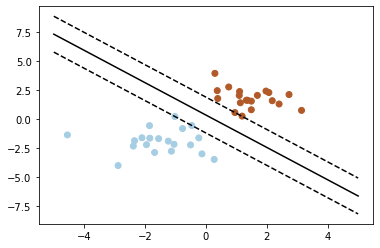

In [1]:
import numpy as np
import pylab as pl
from sklearn import svm

#随机生成两组二位数据
np.random.seed(0)#使每次产生随机数不变
X = np.r_[np.random.randn(20,2)-[2,2],np.random.randn(20,2)+[2,2]]
#np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等，np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等

Y = [0] * 20+[1] * 20

clf=svm.SVC(kernel='linear')
clf.fit(X,Y)

w=clf.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(-5,5)#产生-5到5的线性连续值，间隔为1
yy=a*xx-(clf.intercept_[0])/w[1]  #clf.intercept_[0]是w3.即为公式a1*x1+a2*x2+w3中的w3。(clf.intercept_[0])/w[1]即为直线的截距

#得出支持向量的方程
b=clf.support_vectors_[0]
yy_down=a*xx+(b[1]-a*b[0])#(b[1]-a*b[0])就是简单的算截距
b=clf.support_vectors_[-1]
yy_up=a*xx+(b[1]-a*b[0])

print("w:",w) #打印出权重系数
print("a:",a) #打印出斜率
print("suport_vectors_:",clf.support_vectors_)#打印出支持向量
print("clf.coef_:",clf.coef_)                  #打印出权重系数，还是w


#这个就是画出来而已，也可以用matplotlib。
pl.plot(xx,yy,'k-')
pl.plot(xx,yy_down,'k--')
pl.plot(xx,yy_up,'k--')

pl.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,0],s=80,facecolors='none')
pl.scatter(X[:,0],X[:,1],c=Y,cmap=pl.cm.Paired)

pl.axis('tight')
pl.show()

In [2]:
clf.predict([(-2,-2)])

array([0])

### 高维与核函数

线性不可分的时候，就用一个非线性的映射转化到一个更高维度的空间中。

比如一维的[-1,0,1]三个点，0是一类，（-1,1）是另一类。一根直线不可能分开，那就用一个y=x2转化为了[(-1,1),(0,0),(1,1)]这样的话就能用y=0.5这个直线分开。

转化到高维可以分类了，然而又不便于计算了。维度越高，内积算的越慢，就令`K（xi，yi）=φ（xi）·φ（yi）=x1*y1+x2*y2+......+xn*yn`。这里的`φ（x）`就是上面说的映射。

核函数就简化了算内积的数量。让程序运行更快。将映射后的高维空间内积转换成低维空间的函数。

常用的核函数：

https://www.jianshu.com/p/028d1883ad93

惩罚函数$C$和松弛变量$ξ_i≥0$的解释在https://blog.csdn.net/smf0504/article/details/52787129 ，就是为了避免一些无法被分类的实例的影响。

对于多类的分类问题。一般都对于每个类，有以下当前类和其他类的二类分类器。

### 线性不可分&多分类——鸢尾花SVM分类

In [3]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print(iris.target_names)

X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y, test_size=0.3)  # 测试集占30%
print(y_train)

# 'rbf'为高斯核，gamma值越小，分类界面越连续；gamma值越大，分类界面越“散”，分类效果越好，但有可能会过拟合。
clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
clf.fit(X_train, y_train)

print(clf.predict(X_test))
print(y_test)
print(clf.predict(X_test)==y_test)

['setosa' 'versicolor' 'virginica']
[2 2 2 1 0 0 2 2 1 2 2 2 1 0 2 1 1 2 1 0 0 2 1 2 1 0 0 1 1 0 0 2 0 0 1 0 1
 2 0 1 2 0 1 2 1 2 2 1 0 0 1 0 0 2 1 2 0 0 1 2 2 1 2 0 1 1 2 0 2 0 1 2 1 1
 0 2 0 0 2 0 1 1 2 2 1 0 1 0 1 1 2 1 0 1 0 2 0 2 1 0 0 2 0 0 1]
[0 2 2 2 1 2 2 1 0 1 2 2 2 0 2 2 2 1 2 2 2 0 2 2 2 2 2 2 0 1 0 0 2 0 2 2 2
 1 0 0 0 2 1 1 0]
[0 2 1 2 1 2 2 1 0 1 2 2 2 0 0 1 1 1 1 2 0 0 1 2 2 2 1 2 0 1 0 0 2 0 2 2 2
 1 0 0 0 1 1 1 0]
[ True  True False  True  True  True  True  True  True  True  True  True
  True  True False False False  True False  True False  True False  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True]


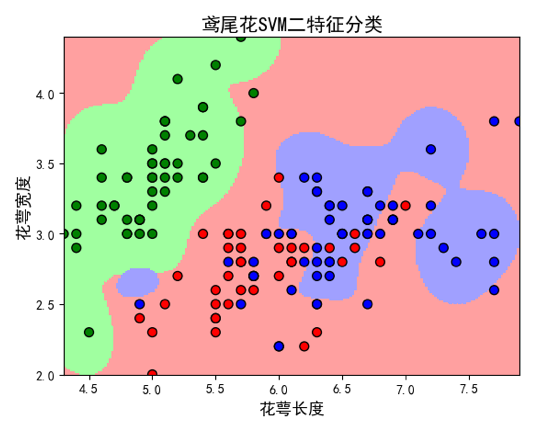

### 线性不可分&主成分分析&多分类&参数搜索——人脸识别

下面是一个人脸识别的程序。

如果数据集下载过程慢，可以手动下载，网址：https://ndownloader.figshare.com/files/5976015 ，Windows下默认存储文件夹路径：C:\Users\用户名\scikit_learn_data\fw_home，去这个文件夹下替换文件lfw-funneled.tgz ；mac上的路径是/Users/用户名/scikit_learn_data/lfw_home/

关于PCA的介绍：

如何通俗易懂地讲解什么是 PCA 主成分分析？ - 马同学的回答 - 知乎
https://www.zhihu.com/question/41120789/answer/481966094

网格搜索，GridSearchCV。https://www.cnblogs.com/wj-1314/p/10422159.html

这个名字其实可以拆分为两部分，GridSearch和CV，即网格搜索和交叉验证。

网格搜索，搜索的是参数，即在指定的参数范围内，利用调整的参数训练学习器，从所有的参数中找到在验证集上精度最高的参数，这其实是一个训练和比较的过程。

2022-01-24 08:41:31,328 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012
2022-01-24 08:41:33,890 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2022-01-24 08:41:36,146 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2022-01-24 08:41:38,833 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


Total dataset size
n_samples: 1288
n_feature: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces
Train PCA in 0.580s
Prijecting the input data on the eigenfaces orthonarmal basis
Done PCA in 0.013s
Fiting the classifier to the training set
Done Fiting in 20.155s
Best estimotor found by grid search:
SVC(C=1000.0, gamma=0.005)
Predicting people's names on the test set
done Predicting in 0.062s
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.64      0.78        22
     Colin Powell       0.80      0.91      0.85        66
  Donald Rumsfeld       0.95      0.74      0.83        27
    George W Bush       0.84      0.95      0.89       129
Gerhard Schroeder       0.93      0.58      0.72        24
      Hugo Chavez       0.91      0.56      0.69        18
       Tony Blair       0.85      0.92      0.88        36

         accuracy                           0.85       322
        macro avg       0.90      0.76      0.81       3

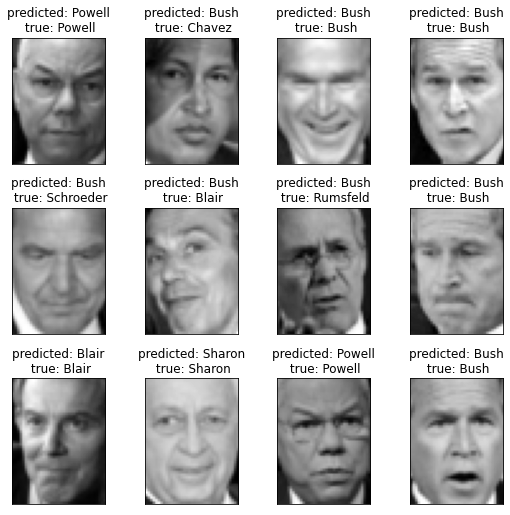

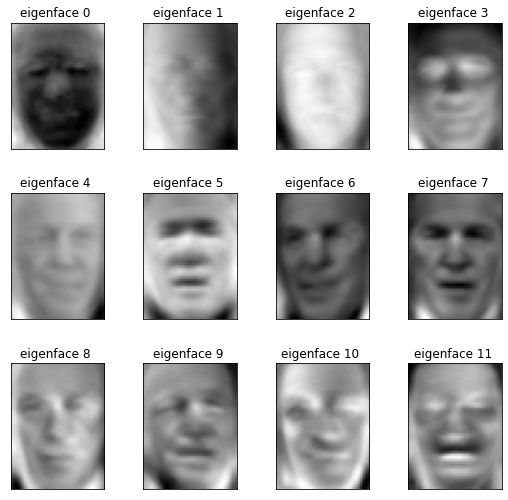

In [4]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# 避免https出错
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

logging.basicConfig(level=logging.INFO,format='%(asctime)s %(message)s')

# min_faces_per_person=定义了每个人取多少个不同图片,resize=重新定义了图片的大小
lfw_people=fetch_lfw_people(min_faces_per_person=70,resize=0.4)

n_samples,h,w=lfw_people.images.shape  #多少个实例，h,w高度，宽度值

X=lfw_people.data   #特征向量矩阵
n_feature=X.shape[1]#每个人有多少个特征值

Y=lfw_people.target
target_names=lfw_people.target_names
n_classes=target_names.shape[0]     #多少类
print("Total dataset size")
print("n_samples:",n_samples)
print("n_feature:",n_feature)
print("n_classes:",n_classes)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)  #选取0.25的测试集

#降维
n_components=150  #PCA算法中所要保留的主成分个数n，也即保留下来的特征个数n
print("Extracting the top %d eigenfaces from %d faces" % (n_components,X_train.shape[0]))
t0=time()
pca=PCA(svd_solver='randomized',n_components=n_components,whiten=True).fit(X_train)#训练一个pca模型

print("Train PCA in %0.3fs" % (time()-t0))

eigenfaces  = pca.components_.reshape((n_components,h,w))  #提取出来特征值之后的矩阵

print("Prijecting the input data on the eigenfaces orthonarmal basis")
t0=time()
X_train_pca = pca.transform(X_train)     #将训练集与测试集降维
X_test_pca = pca.transform(X_test)
print("Done PCA in %0.3fs" % (time()-t0))


print("Fiting the classifier to the training set")
t0=time()
param_grid ={'C':[1e3,5e3,1e4,5e4,1e5],#C是对错误的惩罚
             'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1],}#gamma核函数里多少个特征点会被使用}#对参数尝试不同的值
clf = GridSearchCV(SVC(kernel='rbf'),param_grid)
clf = clf.fit(X_train_pca,Y_train)
print("Done Fiting in %0.3fs" % (time()-t0))

print("Best estimotor found by grid search:")
print(clf.best_estimator_)

print("Predicting people's names on the test set")
t0=time()
Y_pred = clf.predict(X_test_pca)
print("done Predicting in %0.3fs" % (time()-t0))

print(classification_report(Y_test,Y_pred,target_names=target_names)) #生成一个小报告呀
print(confusion_matrix(Y_test,Y_pred,labels=range(n_classes)))#这个也是，生成的矩阵的意思是有多少个被分为此类。


#把分类完的图画出来12个。

#这个函数就是画图的
def plot_gallery(images,titles,h,w,n_row=3,n_col=4):
    plt.figure(figsize=(1.8*n_col,2.4*n_row))
    plt.subplots_adjust(bottom=0,left=.01,right=.99,top=.90,hspace=.35)
    for i in range(n_row*n_col):
        plt.subplot(n_row,n_col,i+1)
        plt.imshow(images[i].reshape((h,w)),cmap=plt.cm.gray)
        plt.title(titles[i],size=12)
        plt.xticks(())
        plt.yticks(())

#这个函数是生成一个固定格式的字符串的
def title(y_pred,y_test,target_names,i):
    pred_name=target_names[y_pred[i]].rsplit(' ',1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return "predicted: %s\n true: %s" %(pred_name,true_name)

predicted_titles=[title(Y_pred,Y_test,target_names,i) for i in range(Y_pred.shape[0])] #这个for循环的用法很简洁

plot_gallery(X_test,predicted_titles,h,w)

eigenfaces_titles=["eigenface %d " % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces,eigenfaces_titles,h,w)

plt.show()